### Data Engineering

In [1]:
## Run Setup code
setup = False

In [2]:
## This script combines all the monthly data files into yearly files

import glob
import os
import pandas as pd

if setup:
    os.makedirs('data_yearly', exist_ok=True)
    row_count = {}

    for year in range(2021, 2025):
        dest_file = f'data_yearly/{year}_divvy_tripdata.csv'
        csv_files = glob.glob(f'data_all/{year}*-divvy-tripdata.csv')
        csv_files.sort()

        total_rows = 0

        for file in csv_files:
            df = pd.read_csv(file)
            df.sort_values(by='started_at', inplace=True)
            if os.path.exists(dest_file):
                df.to_csv(dest_file, mode='a', header=False, index=False)
            else:
                df.to_csv(dest_file, index=False)
                
            total_rows += df.shape[0]

        row_count[year] = total_rows
    print(row_count)

In [3]:
## Check for errors

import pandas as pd

if setup:
    for year in range(2021, 2025):
        size = 0
        df = pd.read_csv(f'data_yearly/{year}_divvy_tripdata.csv', chunksize=1000000)
        for chunk in df:
            # print(chunk.shape)
            # print(chunk.head())
            size += chunk.shape[0]

        import glob
        csv_files = glob.glob(f'data_all/{year}*-divvy-tripdata.csv')
        csv_files

        total_rows = 0

        for file in csv_files:
            df = pd.read_csv(file)
            total_rows += df.shape[0]

        error = False
        if size != total_rows:
            print(f"Error: {year} {size} {total_rows}")
            error = True
            
    if not error:
        print('All good')

In [4]:

import pandas as pd

count = 0
df = pd.read_csv(f'data_yearly/2024_divvy_tripdata.csv', chunksize=1000000)
for chunk in df:
    chunk.dropna(subset=['end_lat','start_lat','end_lng','start_lng','start_station_name','start_station_id','end_station_name','end_station_id'], inplace=True)
    print(chunk.shape)
    count+=1
    if count == 7:
        break

chunk

(765850, 13)
(716389, 13)
(710949, 13)
(713104, 13)
(672372, 13)
(498915, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5000000,413C9F9D87EF0AEF,classic_bike,2024-10-12 19:16:30.519,2024-10-12 19:17:56.208,Wolcott Ave & Polk St,TA1309000064,Hermitage Ave & Polk St,13080,41.871262,-87.673688,41.871514,-87.669886,member
5000002,D833F08942B95192,classic_bike,2024-10-12 19:16:32.648,2024-10-12 19:21:46.497,Larrabee St & Division St,KA1504000079,Clark St & Elm St,TA1307000039,41.903486,-87.643353,41.902973,-87.631280,member
5000003,F9DC57AB15D32EE5,classic_bike,2024-10-12 19:16:35.036,2024-10-12 19:46:21.440,Clark St & Lincoln Ave,13179,Sheffield Ave & Waveland Ave,TA1307000126,41.915689,-87.634600,41.949399,-87.654529,member
5000004,E195AB00F871F348,classic_bike,2024-10-12 19:16:40.551,2024-10-12 19:58:35.633,St. Clair St & Erie St,13016,Michigan Ave & Lake St,TA1305000011,41.894345,-87.622798,41.886022,-87.624398,casual
5000005,CBB659563E844170,electric_bike,2024-10-12 19:16:40.634,2024-10-12 19:40:00.705,Streeter Dr & Grand Ave,13022,Michigan Ave & Washington St,13001,41.892185,-87.611920,41.883984,-87.624684,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682186,C3F10B98311C422B,classic_bike,2024-11-30 23:44:10.992,2024-11-30 23:49:03.811,Paulina St & 18th St,TA1307000159,Racine Ave & 18th St,13164,41.857901,-87.668745,41.858400,-87.656423,member
5682187,854236568B1D1995,classic_bike,2024-11-30 23:44:35.647,2024-11-30 23:57:43.002,Wabash Ave & Wacker Pl,TA1307000131,Indiana Ave & Roosevelt Rd,SL-005,41.886875,-87.626030,41.867888,-87.623041,member
5682188,1763BF260B6D0803,classic_bike,2024-11-30 23:47:17.635,2024-11-30 23:49:32.863,Broadway & Sheridan Rd,13323,Broadway & Waveland Ave,13325,41.952833,-87.649993,41.949074,-87.648636,member
5682189,30F07A59B5259AF6,classic_bike,2024-11-30 23:47:31.938,2024-11-30 23:56:38.164,Winchester Ave & Elston Ave,KA1504000140,Damen Ave & Pierce Ave,TA1305000041,41.924091,-87.676460,41.908815,-87.677194,casual


In [5]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498915 entries, 5000000 to 5682192
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             498915 non-null  object 
 1   rideable_type       498915 non-null  object 
 2   started_at          498915 non-null  object 
 3   ended_at            498915 non-null  object 
 4   start_station_name  498915 non-null  object 
 5   start_station_id    498915 non-null  object 
 6   end_station_name    498915 non-null  object 
 7   end_station_id      498915 non-null  object 
 8   start_lat           498915 non-null  float64
 9   start_lng           498915 non-null  float64
 10  end_lat             498915 non-null  float64
 11  end_lng             498915 non-null  float64
 12  member_casual       498915 non-null  object 
dtypes: float64(4), object(9)
memory usage: 53.3+ MB


In [6]:
chunk.describe()

,start_lat,start_lng,end_lat,end_lng
count,498915.000000,498915.000000,498915.000000,498915.000000
mean,41.896741,-87.644049,41.897090,-87.644354
std,0.045647,0.026570,0.045799,0.026600
min,41.648501,-87.843960,41.648501,-87.843960
25%,41.878166,-87.656959,41.878317,-87.658139
50%,41.892592,-87.641170,41.893914,-87.641170
75%,41.922167,-87.627691,41.923931,-87.627716
max,42.064854,-87.528232,42.064854,-87.528232


In [7]:
chunk['ride_id'] = chunk['ride_id'].str[:-6]
chunk.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5000000,413C9F9D87,classic_bike,2024-10-12 19:16:30.519,2024-10-12 19:17:56.208,Wolcott Ave & Polk St,TA1309000064,Hermitage Ave & Polk St,13080,41.871262,-87.673688,41.871514,-87.669886,member
5000002,D833F08942,classic_bike,2024-10-12 19:16:32.648,2024-10-12 19:21:46.497,Larrabee St & Division St,KA1504000079,Clark St & Elm St,TA1307000039,41.903486,-87.643353,41.902973,-87.631280,member
5000003,F9DC57AB15,classic_bike,2024-10-12 19:16:35.036,2024-10-12 19:46:21.440,Clark St & Lincoln Ave,13179,Sheffield Ave & Waveland Ave,TA1307000126,41.915689,-87.634600,41.949399,-87.654529,member
5000004,E195AB00F8,classic_bike,2024-10-12 19:16:40.551,2024-10-12 19:58:35.633,St. Clair St & Erie St,13016,Michigan Ave & Lake St,TA1305000011,41.894345,-87.622798,41.886022,-87.624398,casual
5000005,CBB659563E,electric_bike,2024-10-12 19:16:40.634,2024-10-12 19:40:00.705,Streeter Dr & Grand Ave,13022,Michigan Ave & Washington St,13001,41.892185,-87.611920,41.883984,-87.624684,casual


In [8]:
import pandas as pd

weather_df = pd.read_csv('weather_data.csv')
weather_df['date'] = weather_df['date'].str[:-6]
# weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce')
weather_df['date'] = pd.to_datetime(weather_df['date'], utc=False)
# weather_df['date'] = weather_df['date'].dt.tz_localize(None)
weather_df.head()

,date,temperature_2m,precipitation,rain,snowfall,wind_speed_10m,wind_speed_100m,wind_direction_100m
0,2020-12-30 00:00:00,-0.1435,1.8,1.8,0.0,23.444265,37.815426,178.36346
1,2020-12-30 01:00:00,0.0565,1.6,1.6,0.0,23.762726,38.580513,183.20943
2,2020-12-30 02:00:00,0.5065,1.2,1.2,0.0,24.648829,40.603470,190.21391
3,2020-12-30 03:00:00,0.8565,0.9,0.9,0.0,25.148520,41.688557,196.55714
4,2020-12-30 04:00:00,1.5565,1.6,1.6,0.0,27.098220,43.726290,202.76505


In [21]:
## Data Transformation

import numpy as np

def data_transform(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', dayfirst=True)
    df.sort_values('started_at', inplace=True)

    if groupby == 'D':
        features = df.groupby(df['started_at'].dt.date).size().reset_index(name='ride_count')
    elif groupby == 'H':
        features = df.groupby([pd.Grouper(key='started_at', freq='h'), 'start_station_name']).size().reset_index(name='ride_count')
    features['started_at'] = pd.to_datetime(features['started_at'])
    # features.set_index('started_at', inplace=True)

    features['day_of_year'] = features['started_at'].dt.dayofyear
    features['week_of_year'] = features['started_at'].dt.isocalendar().week
    features['day_of_week'] = features['started_at'].dt.dayofweek
    features['is_weekend'] = (features['day_of_week'] >= 5).astype(int)
    features['year'] = features['started_at'].dt.year
    features['month'] = features['started_at'].dt.month
    features['day'] = features['started_at'].dt.day
    features['hour'] = features['started_at'].dt.hour

    features['day_sin'] = np.sin(features['day_of_week'] * (2 * np.pi / 7))
    features['day_cos'] = np.cos(features['day_of_week'] * (2 * np.pi / 7))
    features['week_sin'] = np.sin(features['week_of_year'] * (2 * np.pi / 52))
    features['week_cos'] = np.cos(features['week_of_year'] * (2 * np.pi / 52))
    features['month_sin'] = np.sin((features['month'] - 1) * (2 * np.pi / 12))
    features['month_cos'] = np.cos((features['month'] - 1) * (2 * np.pi / 12))
    features['hour_sin'] = np.sin(features['hour'] * (2 * np.pi / 24))
    features['hour_cos'] = np.cos(features['hour'] * (2 * np.pi / 24))
    
    features.drop(columns=['month', 'day', 'hour', 'week_of_year', 'started_at'], inplace=True)
    
    # merged_df = pd.merge(features, weather_df, left_on=features['started_at'], right_on=weather_df['date'], how='left')
    # merged_df.drop(columns=['key_0','date'], inplace=True)

    return features

In [22]:
## Station Encoding

import category_encoders as ce
import pickle

os.makedirs('models', exist_ok=True)

if setup:
    unique_stations = []

    for year in range(2021, 2024):
        df = pd.read_csv(f'data_yearly/{year}_divvy_tripdata.csv', chunksize=1000000)
        for chunk in df:
            ride_freq_df = data_transform(chunk, groupby='H')
            unique_stations_chunk = ride_freq_df['start_station_name'].unique()
            unique_stations = np.union1d(unique_stations, unique_stations_chunk)
        
    be = ce.BinaryEncoder(handle_unknown='value', return_df=True).fit(unique_stations)
    pickle.dump(be, open('models/station_encoder.pkl', 'wb'))
    
be = pickle.load(open('models/station_encoder.pkl', 'rb'))

In [23]:
unique_stations

array(['10101 S Stony Island Ave', '111th St - Morgan Park Metra',
       '2112 W Peterson Ave', ..., 'Yates Blvd & 93rd St',
       'Yates Blvd & Exchange Ave', 'Zapata Academy'], dtype=object)

In [31]:
## Data Cleaning

import os

os.makedirs('data_cleaned', exist_ok=True)
for year in range(2021, 2024):
    dest_file = f'data_cleaned/{year}_divvy_tripdata.csv'
    df = pd.read_csv(f'data_yearly/{year}_divvy_tripdata.csv', chunksize=1000000)
    print(year)
    for chunk in df:
        chunk.dropna(subset=['end_lat','start_lat','end_lng','start_lng'], inplace=True)
        ride_freq_df = data_transform(chunk, groupby='H')
        # ride_freq_df['start_station_name_encoded'] = be.transform(ride_freq_df['start_station_name'])
        # ride_freq_df['start_station_name'] = be.transform(ride_freq_df['start_station_name'])
        # print(be.transform(list(ride_freq_df['start_station_name'])))
        
        station_encoded = be.transform(list(ride_freq_df['start_station_name']))
        station_encoded.columns = [f'station_name_{col}' for col in station_encoded.columns]
        
        ride_freq_df = ride_freq_df.merge(station_encoded, left_index=True, right_index=True)
        ride_freq_df.drop(columns=['start_station_name'], inplace=True)
        
        if os.path.exists(dest_file):
            ride_freq_df.to_csv(dest_file, mode='a', header=False, index=False)
        else:
            ride_freq_df.to_csv(dest_file, index=False)
        # break
        print(ride_freq_df.shape[0])
    break

ride_freq_df

415263
248885
236435
245226
263939
227848


,ride_count,day_of_year,day_of_week,is_weekend,year,day_sin,day_cos,week_sin,week_cos,month_sin,...,station_name_0_2,station_name_0_3,station_name_0_4,station_name_0_5,station_name_0_6,station_name_0_7,station_name_0_8,station_name_0_9,station_name_0_10,station_name_0_11
0,2,305,0,0,2021,0.000000,1.000000,-0.822984,0.568065,-0.866025,...,0,0,0,0,0,0,1,1,0,1
1,1,305,0,0,2021,0.000000,1.000000,-0.822984,0.568065,-0.866025,...,0,0,0,0,0,0,1,1,1,1
2,1,305,0,0,2021,0.000000,1.000000,-0.822984,0.568065,-0.866025,...,0,0,0,0,0,1,0,1,0,1
3,1,305,0,0,2021,0.000000,1.000000,-0.822984,0.568065,-0.866025,...,0,0,0,0,1,0,0,1,1,1
4,2,305,0,0,2021,0.000000,1.000000,-0.822984,0.568065,-0.866025,...,0,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227843,1,365,4,0,2021,-0.433884,-0.900969,-0.0,1.0,-0.500000,...,1,1,1,1,0,1,0,0,1,0
227844,3,365,4,0,2021,-0.433884,-0.900969,-0.0,1.0,-0.500000,...,1,1,1,1,0,1,1,0,1,0
227845,1,365,4,0,2021,-0.433884,-0.900969,-0.0,1.0,-0.500000,...,1,1,1,1,1,0,1,0,0,0
227846,1,365,4,0,2021,-0.433884,-0.900969,-0.0,1.0,-0.500000,...,1,1,1,1,1,0,1,0,0,1


In [30]:
415263+248885+236435+245226+263939+227848

1637596

In [32]:
!pip install xgboost

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/goprocam-4.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00a 0:00:01


In [52]:
train_shape, test_shape = round(1637596 * 0.8), round(1637596 * 0.2)

train_shape, test_shape

(1310077, 327519)

In [54]:
train_shape % 1000000

310077

In [58]:
from xgboost import XGBRegressor

row_count = 0
for year in range(2021, 2024):
    src_file = f'data_cleaned/{year}_divvy_tripdata.csv'
    df = pd.read_csv(src_file, chunksize=1000000)
    for chunk in df:
        row_count += chunk.shape[0]
        if row_count > train_shape:
            chunk = chunk.head(train_shape % 1000000)
            print(chunk.shape)
            model = XGBRegressor()
            if os.path.exists('models/xgb_model.json'):
                model.fit(chunk.drop(columns=['ride_count']), chunk['ride_count'], xgb_model='models/xgb_model.json')
            else:
                model.fit(chunk.drop(columns=['ride_count']), chunk['ride_count'])
            model.save_model(f'models/xgb_model.json')
            break
        else:
            print(chunk.shape)
            model = XGBRegressor()
            if os.path.exists('models/xgb_model.json'):
                model.fit(chunk.drop(columns=['ride_count']), chunk['ride_count'], xgb_model='models/xgb_model.json')
            else:
                model.fit(chunk.drop(columns=['ride_count']), chunk['ride_count'])
            model.save_model(f'models/xgb_model.json')
    break
    

(1000000, 25)
(310077, 25)


In [69]:
df = pd.read_csv(src_file, chunksize=1000000)
row_count = 0

for chunk in df:
    print(chunk.shape)
    row_count += chunk.shape[0]
    if row_count > train_shape:
        chunk = chunk.tail(chunk.shape[0] - 310077)
        pred = model.predict(chunk.drop(columns=['ride_count']))
        break
    
chunk

(1000000, 25)
(637596, 25)


,ride_count,day_of_year,day_of_week,is_weekend,year,day_sin,day_cos,week_sin,week_cos,month_sin,...,station_name_0_2,station_name_0_3,station_name_0_4,station_name_0_5,station_name_0_6,station_name_0_7,station_name_0_8,station_name_0_9,station_name_0_10,station_name_0_11
1310077,1,286,2,0,2021,0.974928,-0.222521,-9.709418e-01,0.239316,-1.0,...,0,1,0,1,1,1,1,0,0,0
1310078,1,286,2,0,2021,0.974928,-0.222521,-9.709418e-01,0.239316,-1.0,...,0,1,0,1,1,1,1,0,0,1
1310079,3,286,2,0,2021,0.974928,-0.222521,-9.709418e-01,0.239316,-1.0,...,0,1,0,1,1,1,1,0,1,0
1310080,3,286,2,0,2021,0.974928,-0.222521,-9.709418e-01,0.239316,-1.0,...,0,1,1,0,0,0,0,0,1,0
1310081,3,286,2,0,2021,0.974928,-0.222521,-9.709418e-01,0.239316,-1.0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637591,1,365,4,0,2021,-0.433884,-0.900969,-2.449294e-16,1.000000,-0.5,...,1,1,1,1,0,1,0,0,1,0
1637592,3,365,4,0,2021,-0.433884,-0.900969,-2.449294e-16,1.000000,-0.5,...,1,1,1,1,0,1,1,0,1,0
1637593,1,365,4,0,2021,-0.433884,-0.900969,-2.449294e-16,1.000000,-0.5,...,1,1,1,1,1,0,1,0,0,0
1637594,1,365,4,0,2021,-0.433884,-0.900969,-2.449294e-16,1.000000,-0.5,...,1,1,1,1,1,0,1,0,0,1


In [76]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327519 entries, 1310077 to 1637595
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_count         327519 non-null  int64  
 1   day_of_year        327519 non-null  int64  
 2   day_of_week        327519 non-null  int64  
 3   is_weekend         327519 non-null  int64  
 4   year               327519 non-null  int64  
 5   day_sin            327519 non-null  float64
 6   day_cos            327519 non-null  float64
 7   week_sin           327519 non-null  float64
 8   week_cos           327519 non-null  float64
 9   month_sin          327519 non-null  float64
 10  month_cos          327519 non-null  float64
 11  hour_sin           327519 non-null  float64
 12  hour_cos           327519 non-null  float64
 13  station_name_0_0   327519 non-null  int64  
 14  station_name_0_1   327519 non-null  int64  
 15  station_name_0_2   327519 non-null  int64  


In [74]:
pred

array([5.2987742, 4.663936 , 6.0266533, ..., 5.393676 , 4.3860674,
       3.88064  ], dtype=float32)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(chunk['ride_count'], pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(chunk['ride_count'], pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = mean_squared_error(chunk['ride_count'], pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.891864545283946
Mean Squared Error (MSE): 7.124223848600309
Root Mean Squared Error (RMSE): 2.6691241725705286


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


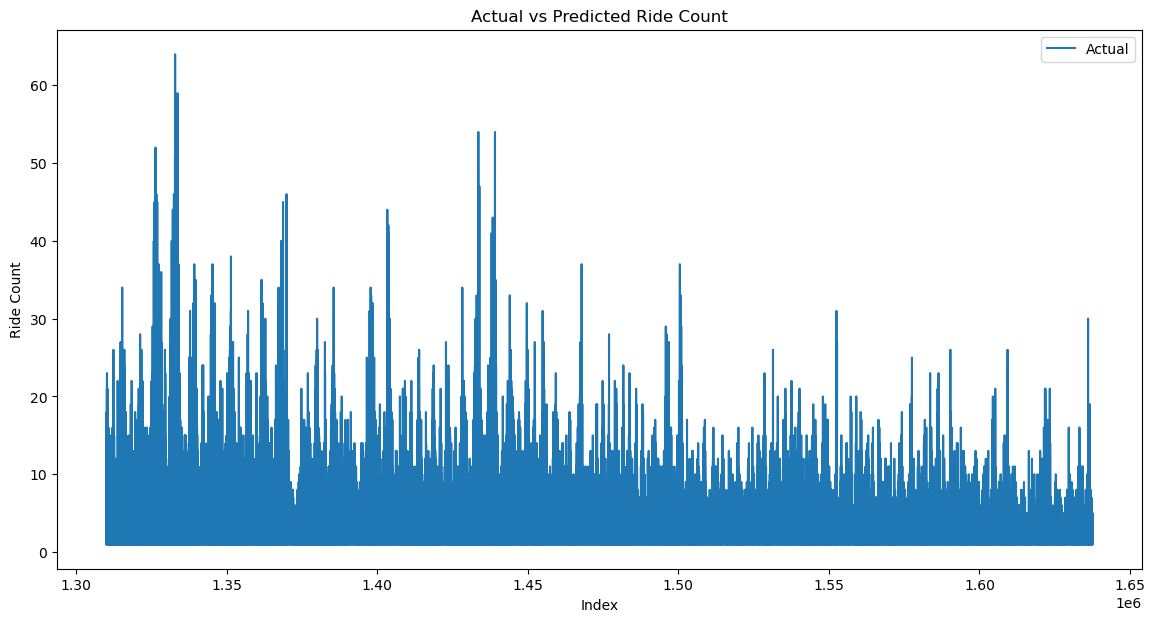

In [81]:
import matplotlib.pyplot as plt

# Assuming 'chunk' contains the actual values and 'pred' contains the predicted values
plt.figure(figsize=(14, 7))
plt.plot(chunk.index, chunk['ride_count'], label='Actual')
# plt.plot(chunk.index, pred, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Ride Count')
plt.title('Actual vs Predicted Ride Count')
plt.legend()
plt.show()

In [82]:
chunk['ride_count']

1310077    1
1310078    1
1310079    3
1310080    3
1310081    3
          ..
1637591    1
1637592    3
1637593    1
1637594    1
1637595    2
Name: ride_count, Length: 327519, dtype: int64

In [ ]:
model.predict()

In [46]:
from sklearn.feature_extraction import FeatureHasher

# Sample data
data = [{'start_station_name': 'Station A'},
        {'start_station_name': 'Station B'},
        {'start_station_name': 'Station D'}]

# Initialize Feature Hasher
hasher = FeatureHasher(n_features=8, input_type='dict')

# Transform data
hashed_features = hasher.transform(data)

# Convert to DataFrame for better visualization
hashed_df = pd.DataFrame(hashed_features.toarray())
print("Hashed Features:\n", hashed_df)


Hashed Features:
      0    1    2    3    4    5    6    7
0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0


In [26]:
ride_freq_df

,started_at,start_station_name,ride_count,day_of_year,week_of_year,day_of_week,is_weekend,day_sin,day_cos
0,2021-01-01 00:00:00,Broadway & Belmont Ave,1,1,53,4,0,-0.433884,-0.900969
1,2021-01-01 00:00:00,Cityfront Plaza Dr & Pioneer Ct,2,1,53,4,0,-0.433884,-0.900969
2,2021-01-01 00:00:00,Clarendon Ave & Junior Ter,1,1,53,4,0,-0.433884,-0.900969
3,2021-01-01 00:00:00,Clark St & Armitage Ave,1,1,53,4,0,-0.433884,-0.900969
4,2021-01-01 00:00:00,Franklin St & Chicago Ave,1,1,53,4,0,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...
415258,2021-05-20 14:00:00,Wood St & Chicago Ave,1,140,20,3,0,0.433884,-0.900969
415259,2021-05-20 14:00:00,Wood St & Milwaukee Ave,3,140,20,3,0,0.433884,-0.900969
415260,2021-05-20 14:00:00,Wood St & Taylor St (Temp),3,140,20,3,0,0.433884,-0.900969
415261,2021-05-20 14:00:00,Woodlawn Ave & 55th St,1,140,20,3,0,0.433884,-0.900969


### Get Coordinates of stations

### Get start and end stations link